In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# setting random seed to 7
np.random.seed(7)

# turning off red warnings
import warnings
warnings.filterwarnings("ignore")

# module for fixing imported modules
from importlib import reload

#import project modules
import src.wrangle as wr
import src.evaluate as ev

pd.options.display.float_format = '{:,.3f}'.format

In [174]:
import src.wrangle as wr

In [194]:
reload(wr)

<module 'src.wrangle' from '/Users/CryanRedrose/codeup-data-science/CodeUp/clustering-project/src/wrangle.py'>

In [277]:
df, _, __ = wr.split_zillow(wr.get_zillow())
df.columns.to_list()

['sqft',
 'garage_sqft',
 'lot_sqft',
 'age',
 'structure_price',
 'price',
 'land_price',
 'tax_amount',
 'bath',
 'beds',
 'bed_bath_ratio',
 'city_id',
 'zip',
 'latitude',
 'longitude',
 'fireplace',
 'garage',
 'hottub_spa',
 'pool',
 'county_land_code',
 'county_number',
 'county_name',
 'logerror']

In [292]:
df['hottub_spa'].unique()

array([0, 1], dtype=uint8)

In [177]:
test = wr.acquire_zillow()
#test = wr.clean_from_ids(test)
#test = wr.rename_columns(test)
#test = wr.fill_nulls(test)
#test = wr.drop_nulls(test)
#test = wr.handle_outliers(test)
#test = wr.transform_columns(test)
#test = wr.engineering(test)

test.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.500,4.000,NaN,NaN,3.500,...,"60,590,630,072,012.000",0.026,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.000,2.000,NaN,NaN,1.000,...,"61,110,010,023,006.000",0.056,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.000,3.000,NaN,NaN,2.000,...,"60,590,218,022,012.000",0.005,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.000,4.000,NaN,8.000,3.000,...,"60,373,001,001,006.000",-0.103,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,781532,12095076,1.000,NaN,NaN,3.000,4.000,NaN,9.000,3.000,...,"60,374,608,001,014.000",-0.001,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [157]:
'''# change floats to ints
for col in test.iloc[:, :-2].columns:
    if test[col].dtype != 'object':
        test[col] = test[col].astype(int)    
        '''

In [124]:
'''# create a list of numerical columns
numerical_columns = ['sqft', 'garage_sqft', 'latitude', 'longitude', 
                'lot_sqft', 'year_built', 'city_id', 'zip',
                'structure_price', 'price', 'land_price', 
                'tax_amount', 'logerror']
                '''

In [135]:
'''for col in test.columns:
        if col not in numerical_columns:
                    
            
            if col in ['county_land_code','fips', 'transactiondate', 'propertylandusedesc']:
                test[col] = pd.Categorical(test[col])
            else:
                test[col] = test[col].astype('uint8')
    '''

In [187]:
num_variables = df.columns.tolist()
num_variables = num_variables[0:19]
num_variables
#cat_variables = df.columns.tolist()
#cat_variables = cat_variables[9:22]
#del cat_variables[2:4]
del num_variables[9:13]

['sqft',
 'garage_sqft',
 'lot_sqft',
 'age',
 'structure_price',
 'price',
 'land_price',
 'tax_amount',
 'bed_bath_ratio',
 'city_id',
 'zip',
 'latitude',
 'longitude',
 'bath',
 'beds',
 'fireplace',
 'garage',
 'hottub_spa',
 'pool']

In [300]:
df['absolute_logerror'] = df['logerror'].abs()

In [207]:
pearson_df = pd.DataFrame(
    {'Potential_Target':[],
     'Coefficient' :[],
     'P-Value' : [],
     'Keep' : [],})

In [214]:
from scipy.stats import spearmanr, pearsonr

In [261]:
def pearson_test_df(df, target_var, test_var_list):
    '''default test for continuous to continuous correlation tests. 
    Handles linear relationships well'''
    
    pearson_df = pd.DataFrame(
        {'Potential_Target':[],
         'Coefficient' :[],
         'P-Value' : [],
         'Minus_P' : [],
         'Keep' : [],})

    for item in test_var_list:
        r, p_value = pearsonr(df[target_var], df[item])
        if 1 - p_value >= 0.95:
            keeper = 'Yes'
        else:
            keeper = 'No'
        
        pearson_df = pearson_df.append(
        {'Potential_Target': item,
         'Coefficient' : r,
         'P-Value' : p_value,
         'Minus_P' : 1-p_value,
         'Keep' : keeper},
        ignore_index = True)
        
    return pearson_df

In [269]:
reload(ev)

<module 'src.evaluate' from '/Users/CryanRedrose/codeup-data-science/CodeUp/clustering-project/src/evaluate.py'>

In [270]:
pearson_df = ev.pearson_test_df(df, 'absolute_logerror', num_variables)
pearson_df = pearson_df.sort_values(by = 'Minus_P', ascending=False)

In [275]:
pearson_df['Potential_Target'][pearson_df.Keep == "No"].to_list()

['pool', 'sqft', 'structure_price']

<AxesSubplot:xlabel='Potential_Target', ylabel='P-Value'>

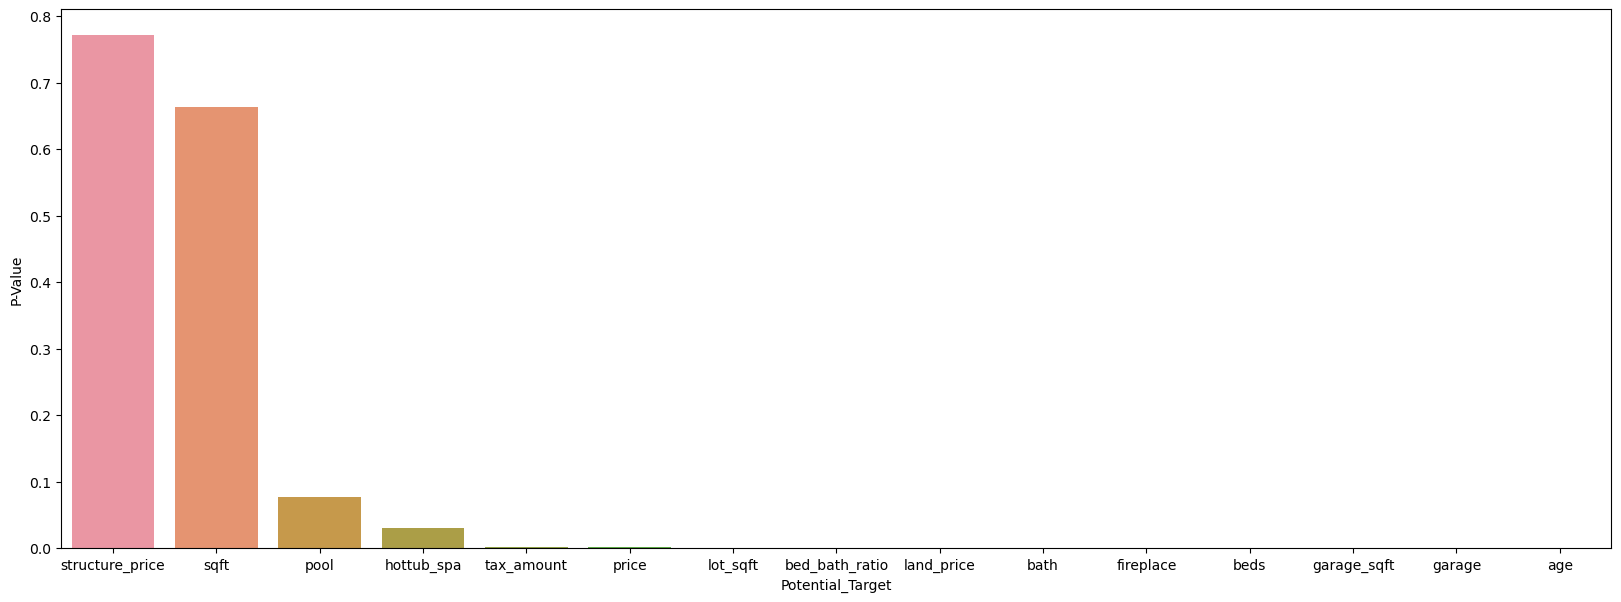

In [249]:
plt.figure(figsize=(20,7))
sns.barplot(data=pearson_df, y='P-Value', x='Potential_Target')


In [ ]:
import plotly.express as px

In [280]:
def correlation_viz():
    df, _, __ = wr.split_zillow(wr.get_zillow())
    num_variables = df.columns.tolist()
    num_variables = num_variables[0:19]
    num_variables
    del num_variables[9:13]
    
    df['absolute_logerror'] = df['logerror'].abs()
    pearson_df = ev.pearson_test_df(df, 'absolute_logerror', num_variables)
    pearson_df = pearson_df.sort_values(by = 'Minus_P', ascending=False)
    fig = px.bar(pearson_df, y='Minus_P', x='Potential_Target',
                 hover_data=['Keep'], color='Keep',
                 labels={'Potential_Target':'Feature Variables To Build Model On', 'Minus_P': '1 - P value'},height=400)
    fig.show()

In [288]:
reload(ev)

<module 'src.evaluate' from '/Users/CryanRedrose/codeup-data-science/CodeUp/clustering-project/src/evaluate.py'>

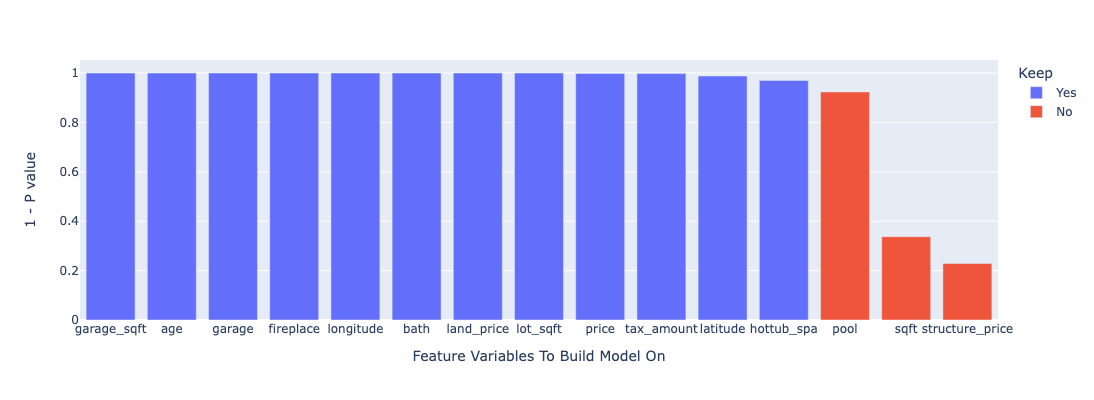

In [289]:
ev.correlation_viz()

In [ ]:
pearson_df = pd.DataFrame(
    {'Potential_Target':[],
     'Coefficient' :[],
     'P-Value' : [],
     'Keep' : [],})

for columns in num_variables:
    ev.pearson_test(df, 'absolute_logerror', columns)
    if 1 - p_value >= 0.095:
        keeper = True
    else:
        kepper - False
    pearson_df = pearson_df.append(
        {'Potential_Target': columns,
     'Coefficient' : r,
     'P-Value' : p_value,
     'Keep' : keeper,}

In [67]:
results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-814.625,"50,696.390",two-sided,0.000,"[-3.28, -3.26]",5.174,inf,1.000


In [297]:
r, p_value = pearsonr(df['land_price'], df['tax_amount'])
print(f'Pearson Correlation Coefficient : {r}\nP-value: {p_value:.3f}')

Pearson Correlation Coefficient : 0.9458270428484641
P-value: 0.000


In [299]:
df.columns.to_list()

['sqft',
 'garage_sqft',
 'lot_sqft',
 'age',
 'structure_price',
 'price',
 'land_price',
 'tax_amount',
 'bath',
 'beds',
 'bed_bath_ratio',
 'city_id',
 'zip',
 'latitude',
 'longitude',
 'fireplace',
 'garage',
 'hottub_spa',
 'pool',
 'county_land_code',
 'county_number',
 'county_name',
 'logerror']

In [312]:
def correlation_plot(df):
    plt.figure(figsize=(20,20))
    
    plt.show()
    sns.set_palette('BrBG_r')
    sns.lmplot(data=df, y='absolute_logerror', x = 'sqft', scatter_kws ={'alpha' : 0.2})
    
    sns.set_palette('BrBG_r')
    sns.lmplot(data=df, y='absolute_logerror', x = 'garage_sqft', scatter_kws ={'alpha' : 0.2})
    plt.show()

In [314]:
reload(ev)

<module 'src.evaluate' from '/Users/CryanRedrose/codeup-data-science/CodeUp/clustering-project/src/evaluate.py'>

<Figure size 2000x2000 with 0 Axes>

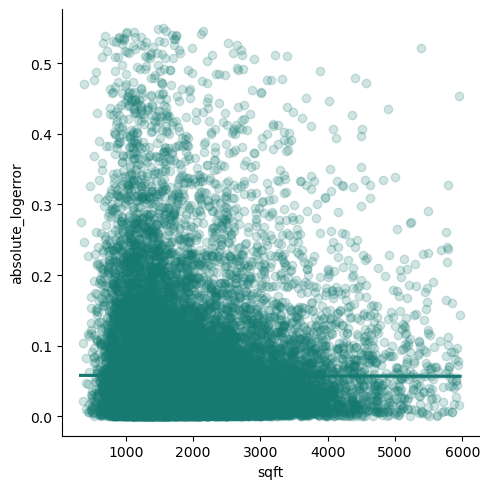

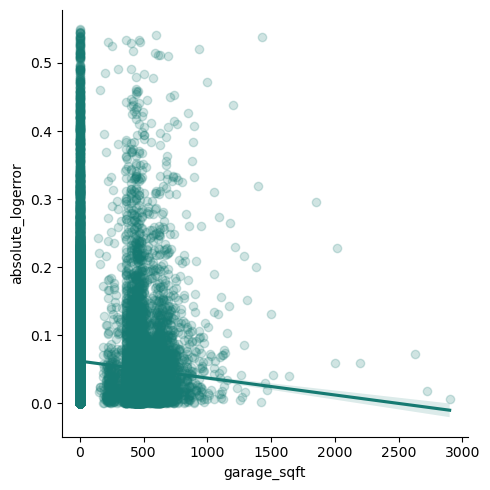

In [316]:
ev.correlation_plot(df)

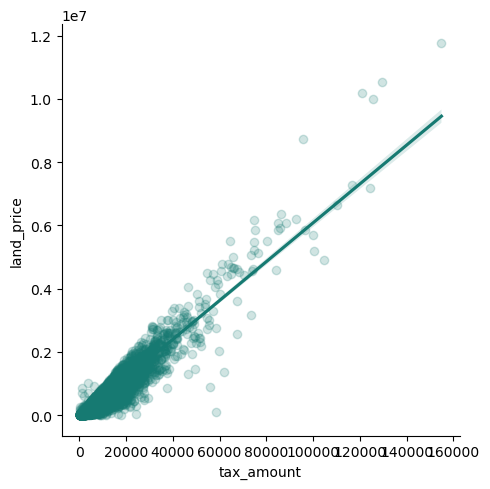

In [295]:
sns.set_palette('BrBG_r')

sns.lmplot(data=df, y='land_price', x = 'tax_amount', scatter_kws ={'alpha' : 0.2})
plt.show()

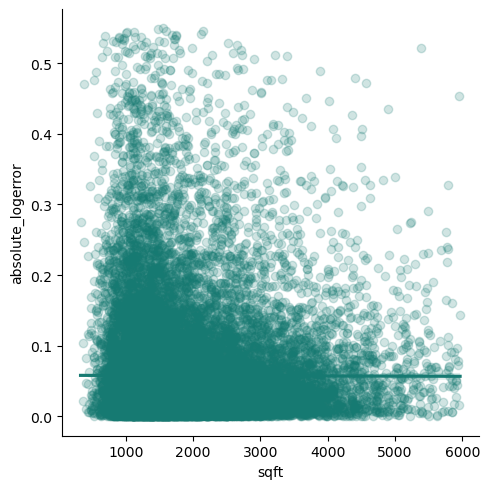

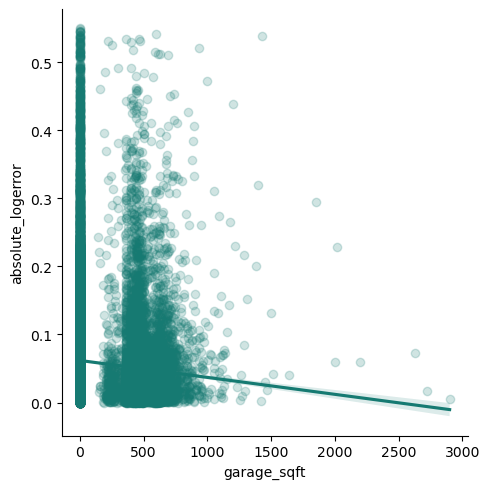

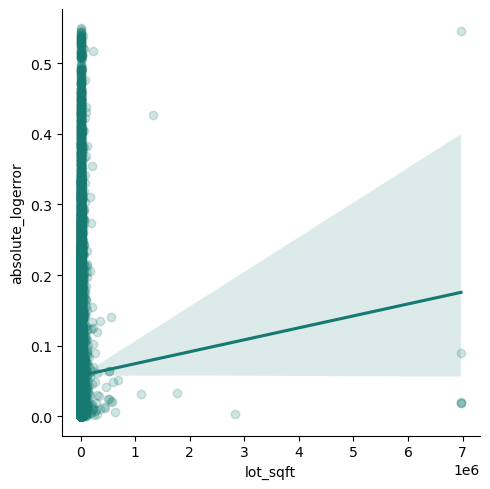

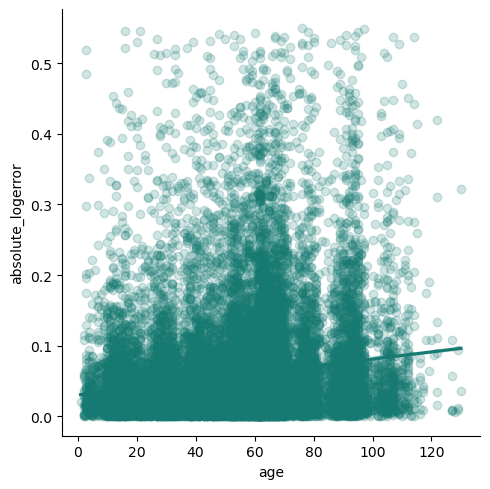

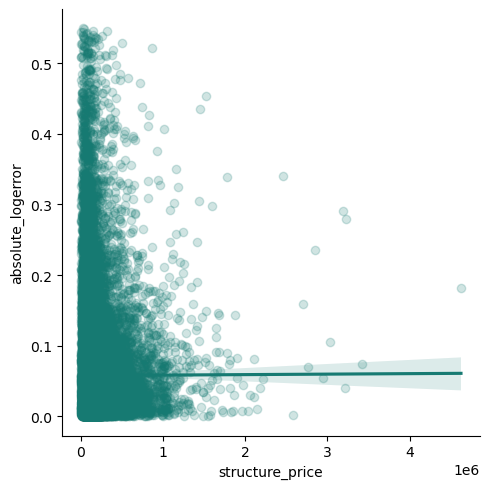

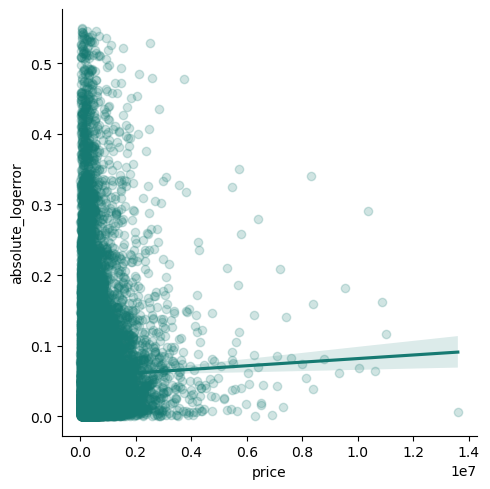

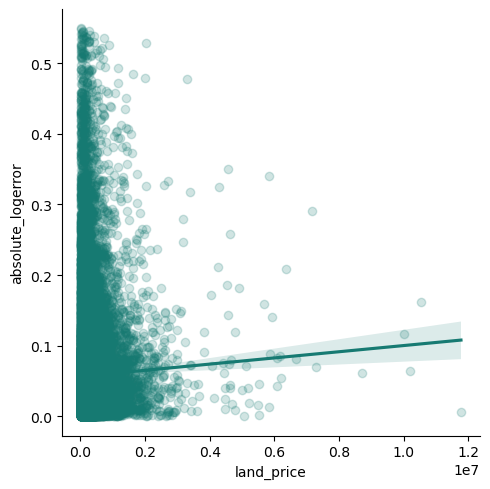

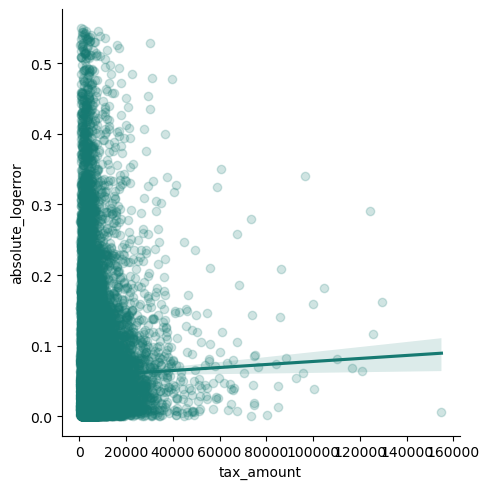

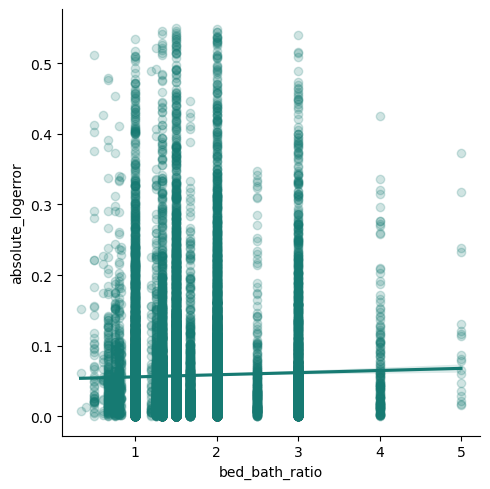

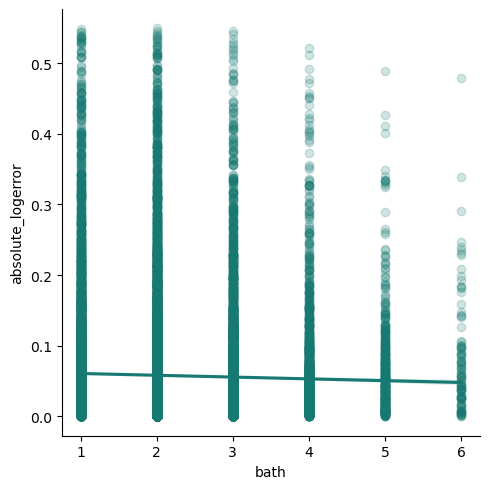

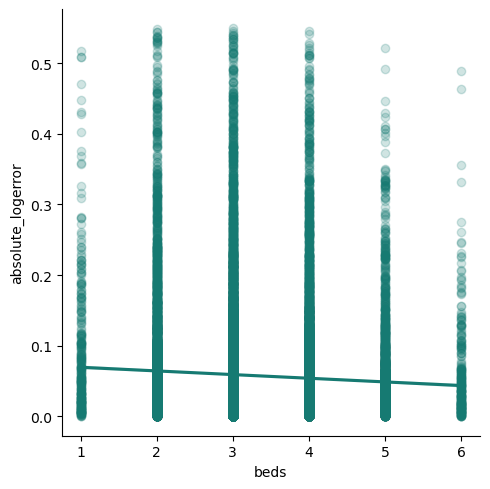

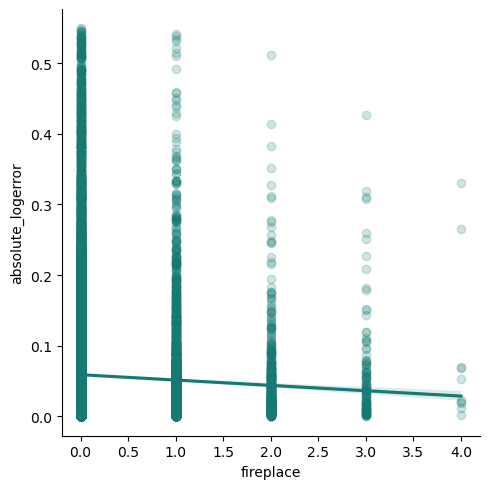

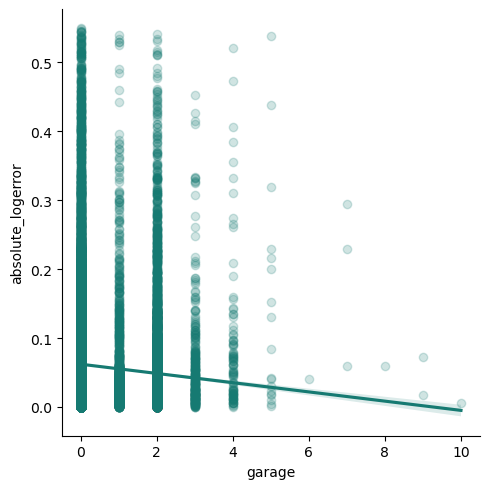

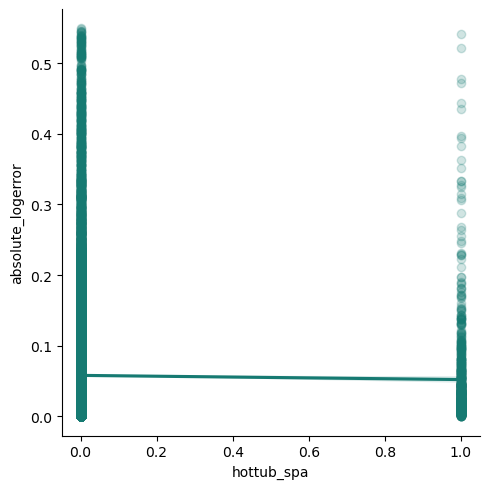

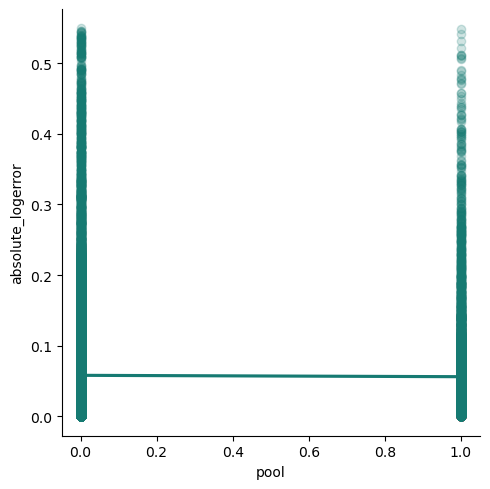

In [200]:
sns.set_palette('BrBG_r')
for i in num_variables:
    sns.lmplot(data=df, y='absolute_logerror', x =i, scatter_kws ={'alpha' : 0.2})
    plt.show()


In [10]:
df.head()

,sqft,garage_sqft,lot_sqft,age,structure_price,price,land_price,tax_amount,bed_bath_ratio,city_id,...,beds,fireplace,garage,hottub_spa,pool,unit,county_land_code,county_number,county_name,logerror
0,3100,633,4506,19,485713,1023282,537569,"11,013.720",1.330,53571,...,4,0,2,0,0,0,122,3,Orange,0.026
1,1465,0,12647,50,88000,464000,376000,"5,672.480",2.000,13091,...,2,1,1,0,0,0,1110,2,Ventura,0.056
2,1243,440,8432,55,85289,564778,479489,"6,488.300",1.500,21412,...,3,0,2,0,1,0,122,3,Orange,0.005
3,2376,0,13038,47,108918,145143,36225,"1,777.510",1.330,396551,...,4,0,0,0,1,1,101,0,LA,-0.103
4,2962,0,63000,67,276684,773303,496619,"9,516.260",1.330,47019,...,4,0,0,0,1,1,101,0,LA,-0.001


In [11]:
df.county_name.unique()

array(['Orange', 'Ventura', 'LA', 'LA_city'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49580 entries, 0 to 52318
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sqft              49580 non-null  int64  
 1   garage_sqft       49580 non-null  int64  
 2   lot_sqft          49580 non-null  int64  
 3   age               49580 non-null  int64  
 4   structure_price   49580 non-null  int64  
 5   price             49580 non-null  int64  
 6   land_price        49580 non-null  int64  
 7   tax_amount        49580 non-null  float64
 8   bed_bath_ratio    49580 non-null  float64
 9   city_id           49580 non-null  int64  
 10  zip               49580 non-null  int64  
 11  latitude          49580 non-null  int64  
 12  longitude         49580 non-null  int64  
 13  bath              49580 non-null  uint8  
 14  beds              49580 non-null  uint8  
 15  fireplace         49580 non-null  uint8  
 16  garage            49580 non-null  uint8 

In [13]:
(df['county_name'] == 'Ventura').sum()

4246

In [14]:
(df['county_name'] == 'Orange').sum()

13372

In [15]:
(df['county_name'] == 'LA').sum()

21076

In [16]:
(df['county_name'] == 'LA_city').sum()

10886

In [53]:
def county_big_viz(df):
    plt.figure(figsize=(20,10))
    big_variables= ['tax_amount','sqft','garage_sqft','lot_sqft']
    

    n =410
    for i in big_variables:
        n+=1 
        plt.subplot(n)
        custom = ['#e13342','#ffd500','#009eff','#76c6ba']
        sns.set_palette(custom)
        sns.histplot(data = df, x=i, hue='county_name', kde = True, bins= 50)#, palette='hsv_r')
    plt.subplots_adjust(hspace=.5)
        

In [58]:
def county_small_viz(df): 
    plt.figure(figsize=(20,20))
    small_variables= ['age','hottub_spa']
    
    n =220
    for i in small_variables:
        n+=1 
        plt.subplot(n)
        custom = ['#e13342','#ffd500','#009eff','#76c6ba']
        sns.set_palette(custom)
        sns.histplot(data = df, x=i, hue='county_name', kde = True,bins = 10)#, palette='hsv_r')
        #plt.subplots_adjust(hspace=.5) 
        
def county_very_small_viz(df): 
    plt.figure(figsize=(20,20))
    small_variables= ['beds','bath','lot_sqft','garage_sqft']
    
    n =220
    for i in small_variables:
        n+=1 
        plt.subplot(n)
        custom = ['#e13342','#ffd500','#009eff','#76c6ba']
        sns.set_palette(custom)
        sns.histplot(data = df, x=i, hue='county_name',bins = 4, kde = True)
        #plt.subplots_adjust(hspace=.5)   
        
        


In [328]:
test = df
test['median_age'] = ''

In [334]:
test['median_age'][test.county_name=='Orange'] = df['age'][df.county_name=='Orange'].median()
test['median_age'][test.county_name=='Ventura'] = df['age'][df.county_name=='Ventura'].median()
test['median_age'][test.county_name=='LA'] = df['age'][df.county_name=='LA'].median()
test['median_age'][test.county_name=='LA_city'] = df['age'][df.county_name=='LA_city'].median()

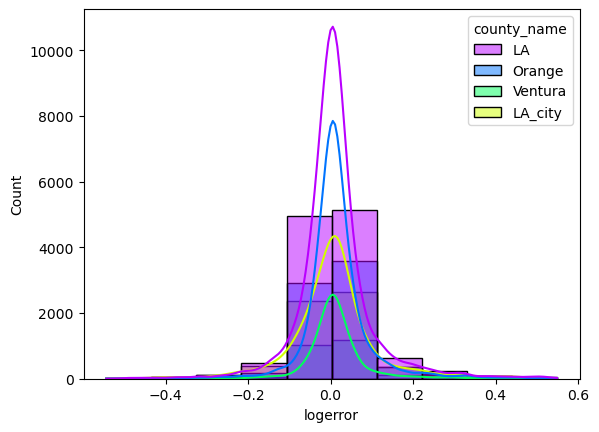

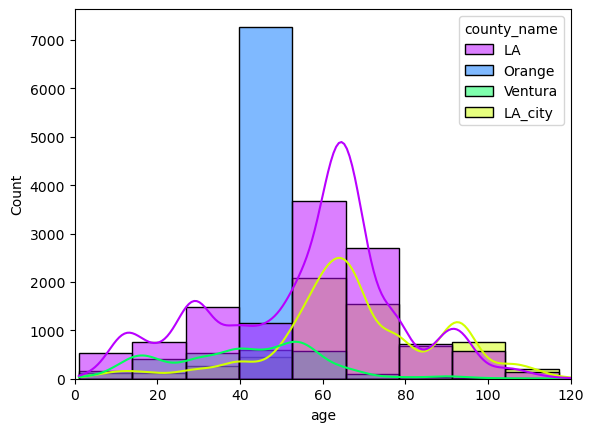

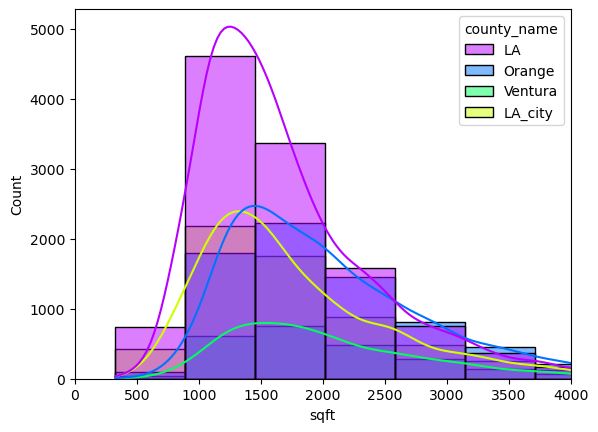

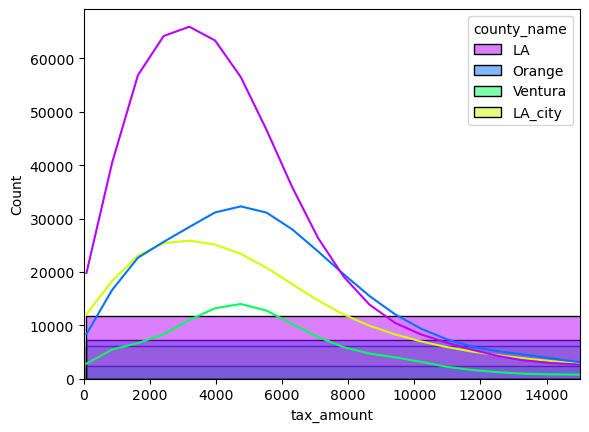

In [369]:
sns.histplot(data = df, x='logerror', hue='county_name', kde = True,bins = 10, palette='hsv_r')
plt.show()
b = sns.histplot(data = df, x='age', hue='county_name', kde = True,bins = 10, palette='hsv_r')
b.set_xlim(0,120)
plt.show()
c = sns.histplot(data = df, x='sqft', hue='county_name', kde = True,bins = 10, palette='hsv_r')
c.set_xlim(0,4_000)
plt.show()
d = sns.histplot(data = df, x='tax_amount', hue='county_name', kde = True,bins = 4, palette='hsv_r')
d.set_xlim(0,15_000)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

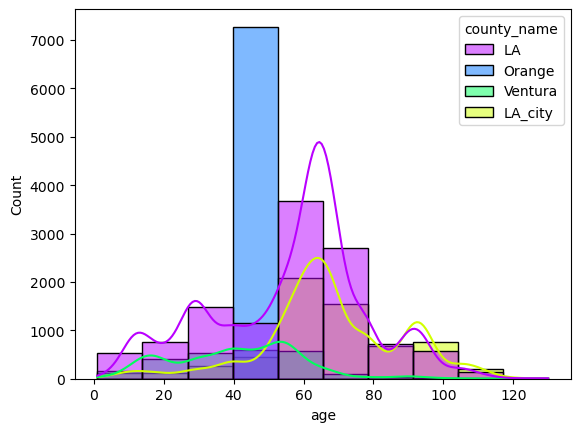

In [353]:
custom = ['#e13342','#ffd500','#009eff','#76c6ba']
#sns.set_palette(custom)
sns.histplot(data = df, x='age', hue='county_name', kde = True,bins = 10, palette='hsv_r')
#sns.barplot(data = test, y= 'tax_amount', x='age', hue='county_name',palette='hsv_r')

<AxesSubplot:xlabel='sqft', ylabel='Count'>

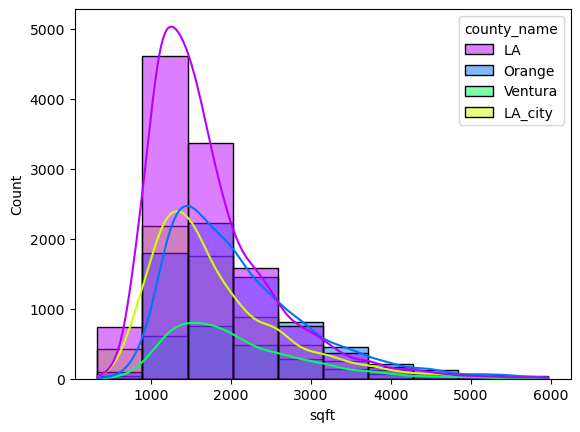

In [355]:
sns.histplot(data = df, x='sqft', hue='county_name', kde = True,bins = 10, palette='hsv_r')

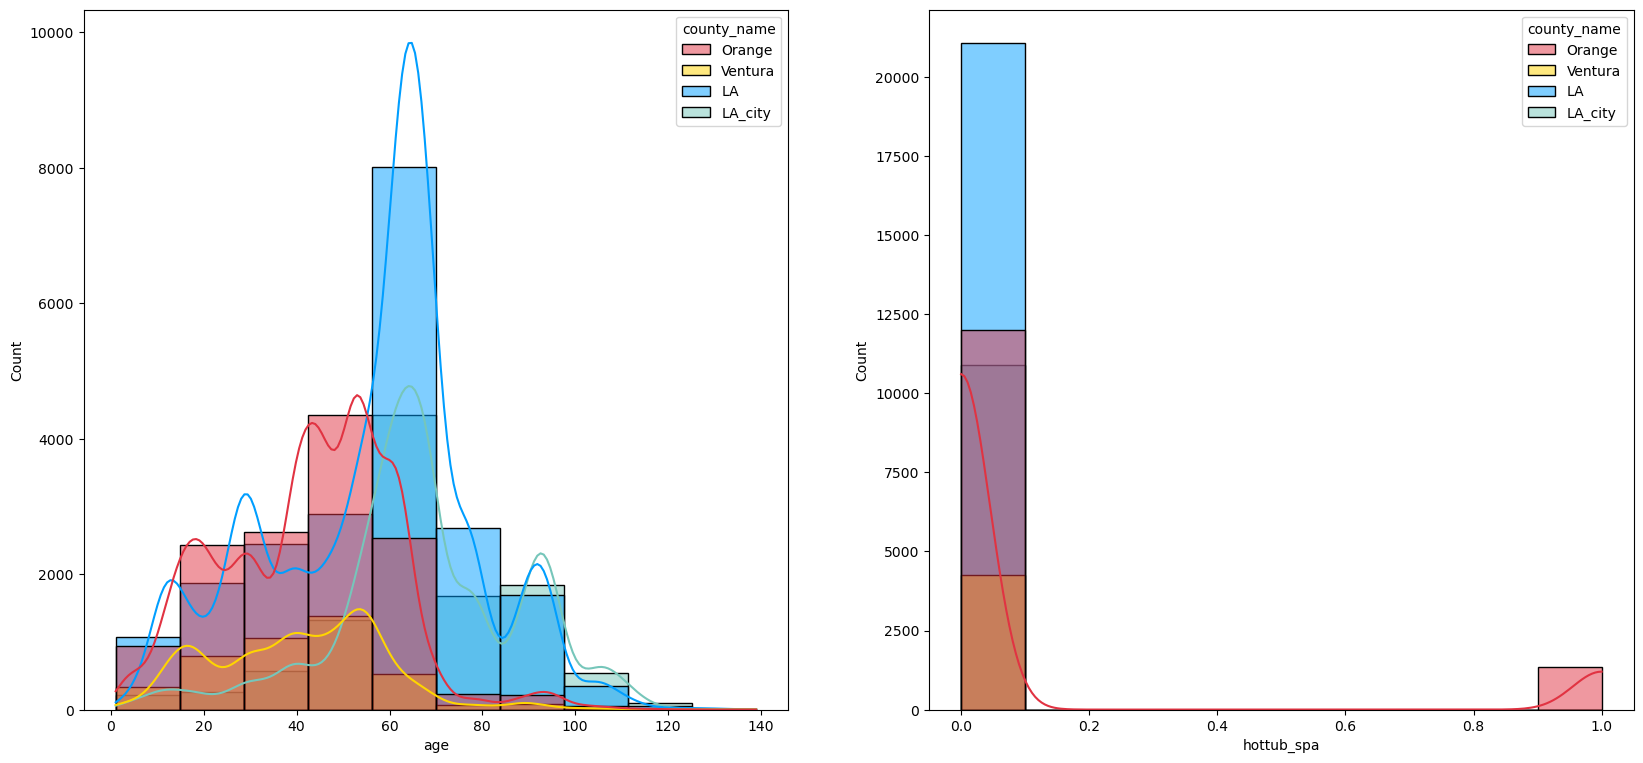

In [59]:
county_small_viz(df)

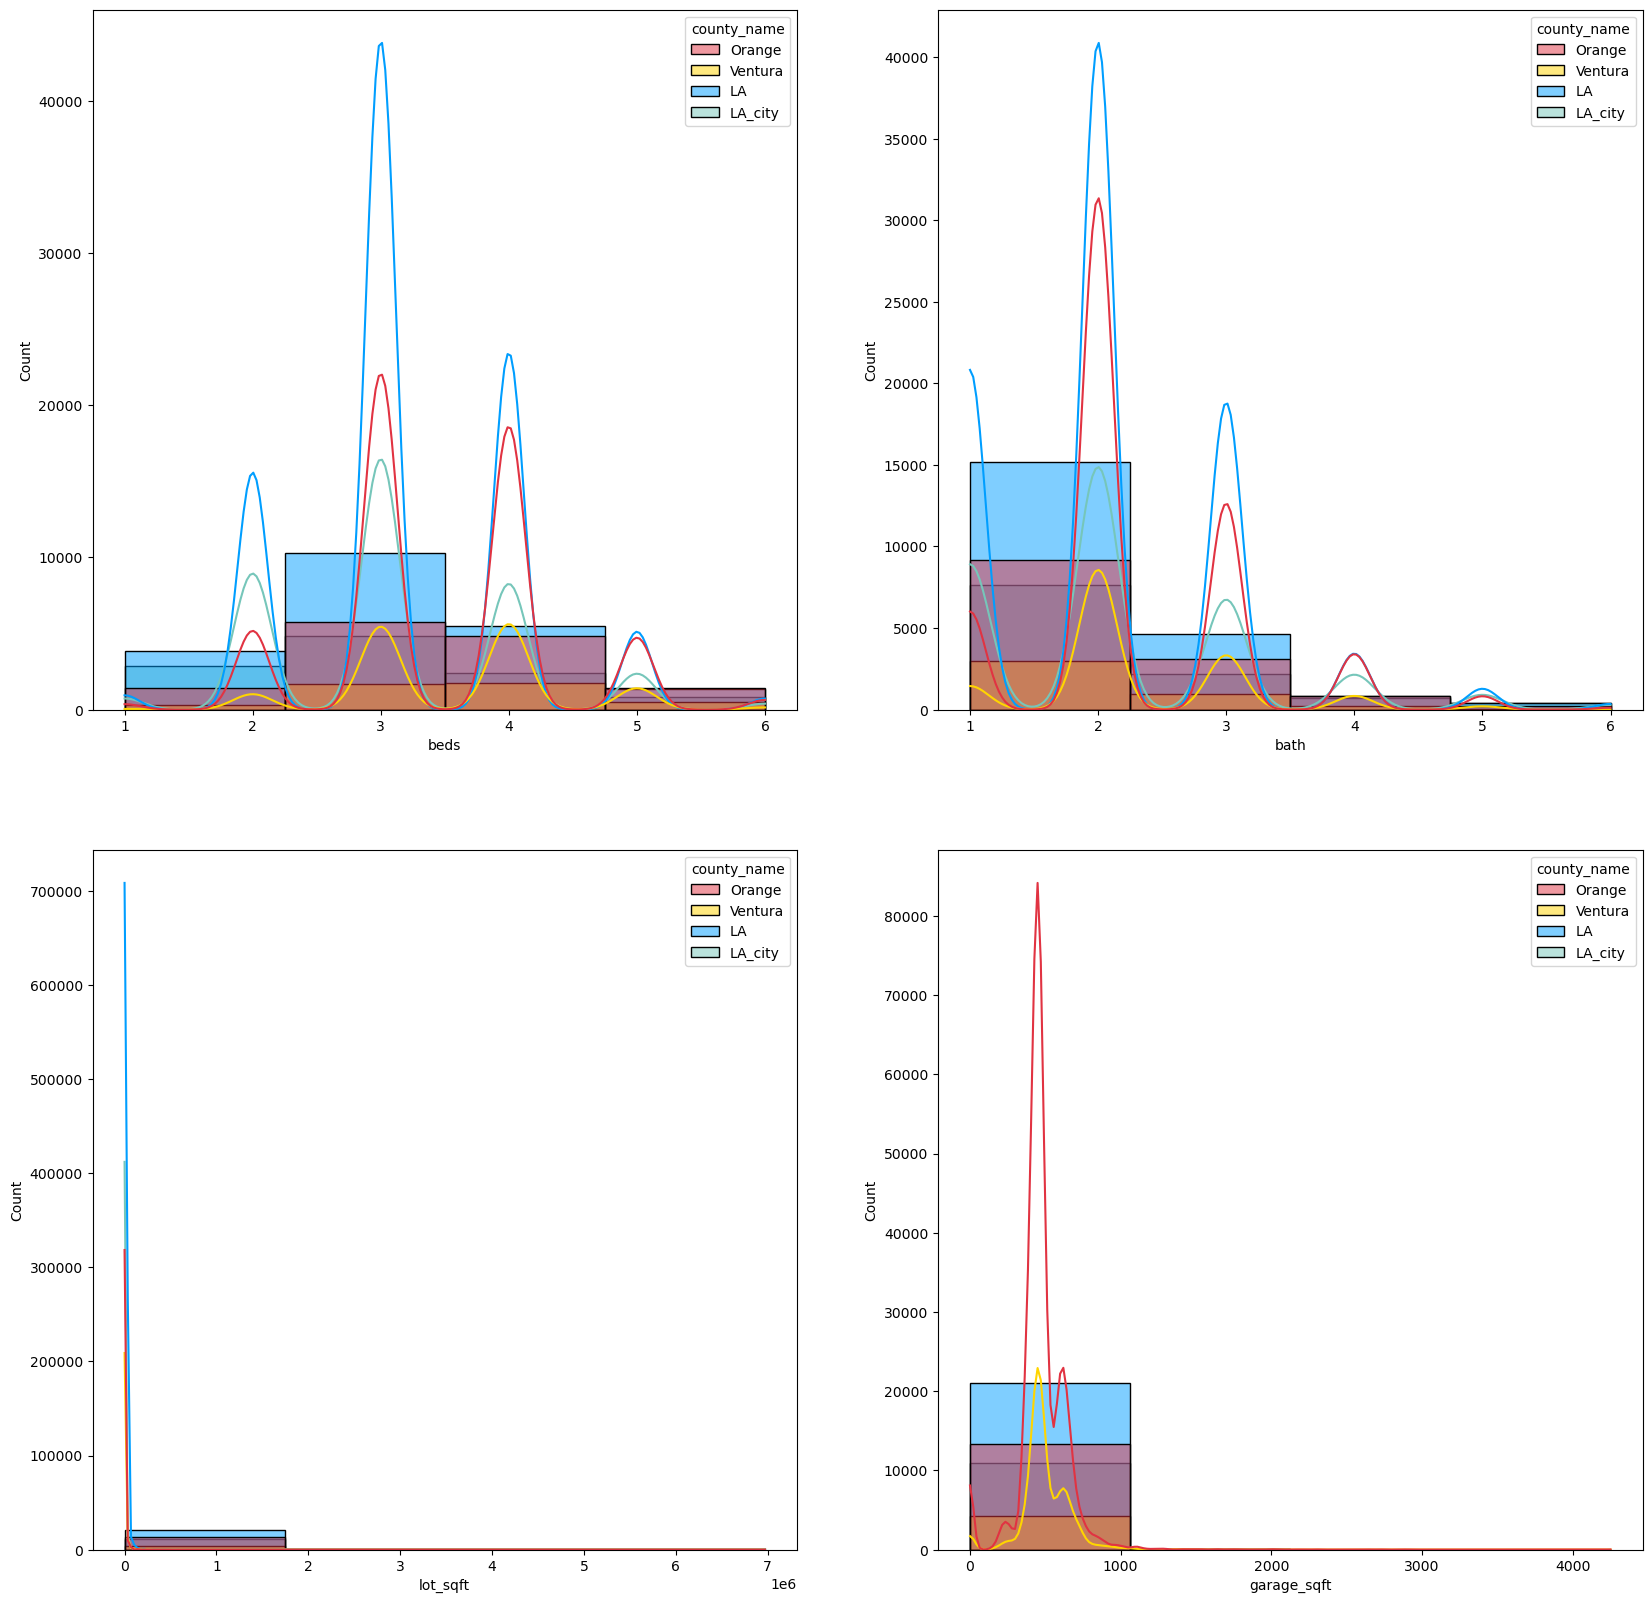

In [56]:
county_very_small_viz(df)

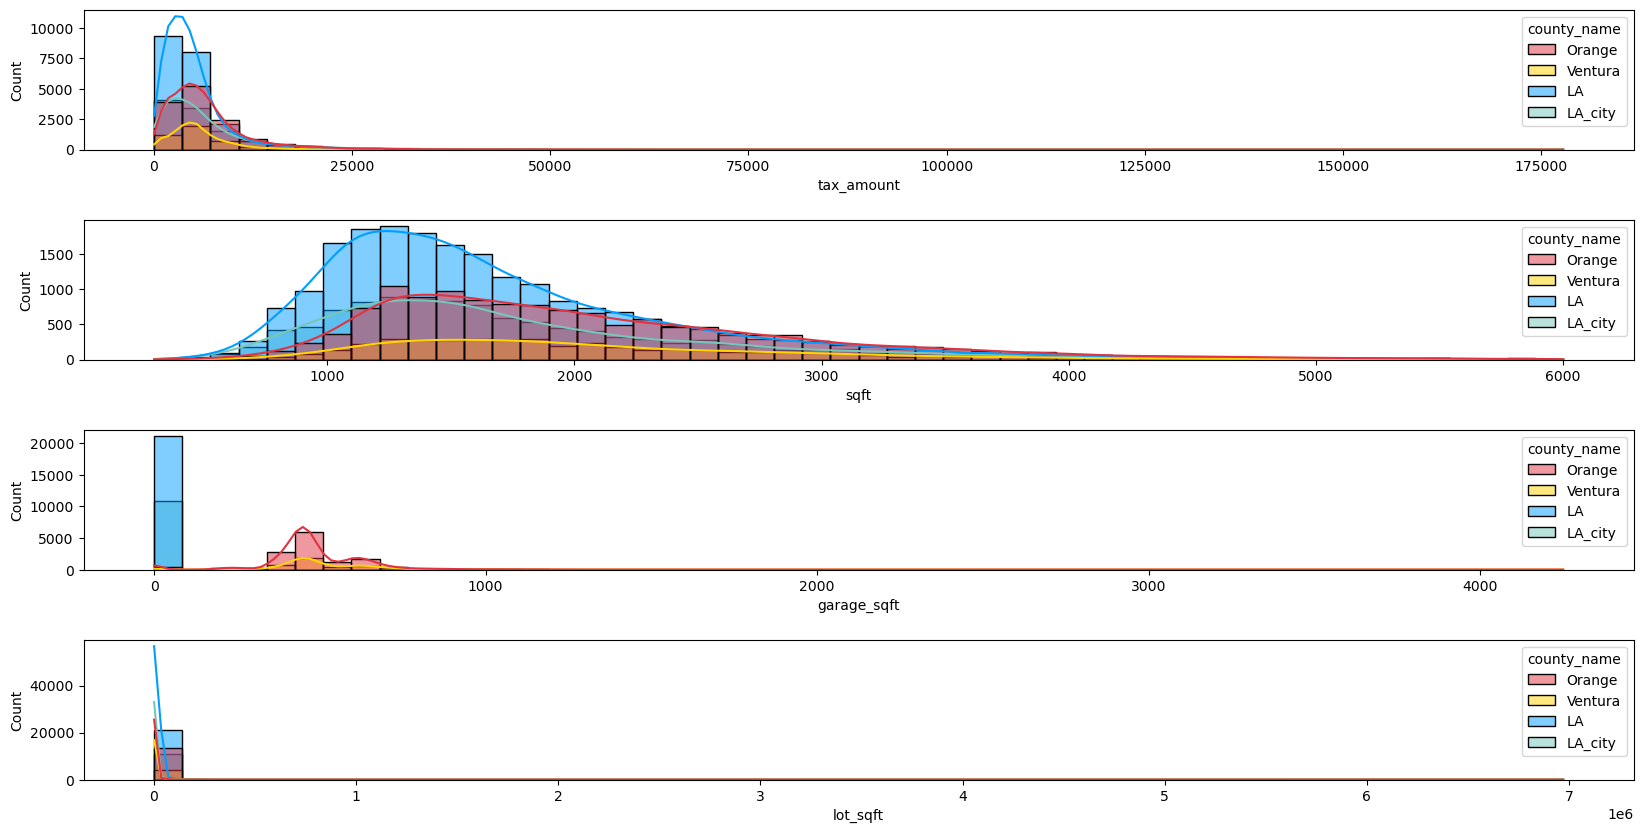

In [57]:
county_big_viz(df)

In [ ]:
color = ["green", "White", "Red", "Yellow", "Green", "Grey"]
sns.set_palette(color)
sns.palplot(sns.color_palette())


In [25]:
sns.color_palette("hsv")

[(1.0, 0.8338243632361279, 0.0),
 (0.309189485660074, 1.0, 0.0),
 (0.0, 1.0, 0.5246319661417559),
 (0.0, 0.6183848775760541, 1.0),
 (0.2154394856600736, 0.0, 1.0),
 (1.0, 0.0, 0.9275743632361277)]

In [26]:
print(sns.color_palette("hsv").as_hex())

['#ffd500', '#4fff00', '#00ff86', '#009eff', '#3700ff', '#ff00ed']


In [36]:
sns.color_palette("plasma")

[(0.32515, 0.006915, 0.639512),
 (0.546157, 0.038954, 0.64701),
 (0.723444, 0.196158, 0.538981),
 (0.85975, 0.360588, 0.406917),
 (0.95547, 0.533093, 0.28549),
 (0.994495, 0.74088, 0.166335)]

In [38]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

In [39]:
print(sns.color_palette("rocket").as_hex())

['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']


In [27]:
sns.color_palette("BrBG")

[(0.6313725490196078, 0.3951557093425605, 0.09573241061130335),
 (0.8572856593617839, 0.7257977700884274, 0.4471357170319107),
 (0.9636293733179546, 0.9237985390234525, 0.8185313341022683),
 (0.8299115724721262, 0.9294886582083814, 0.9152633602460593),
 (0.4615916955017304, 0.7748558246828146, 0.7299500192233758),
 (0.0878892733564014, 0.479123414071511, 0.44775086505190315)]

In [28]:
print(sns.color_palette("BrBG").as_hex())

['#a16518', '#dbb972', '#f6ecd1', '#d4ede9', '#76c6ba', '#167a72']


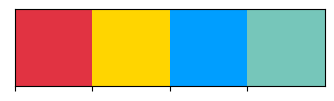

In [52]:
custom = ['#e13342','#ffd500','#009eff','#76c6ba']
sns.set_palette(custom)
sns.palplot(sns.color_palette())

<AxesSubplot:xlabel='unit', ylabel='Count'>

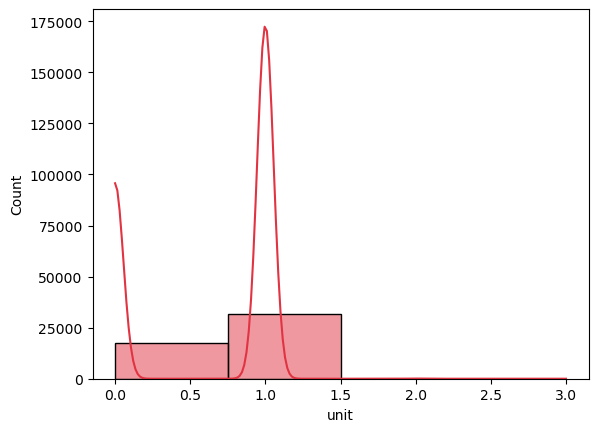

In [61]:
sns.histplot(data = df, x='unit', kde = True,bins = 4, palette='hsv_r')

In [ ]:
#df = df[(df.unitcnt != 2) | (df.unit != 3)]

In [86]:
df_size = df.shape[0]

In [73]:
df[df.unit > 1].shape[0]

18

In [75]:
df[df.unit == 2].shape[0]

17

In [76]:
df[df.unit == 3].shape[0]

1

In [85]:
df.shape[0] - (df[df.unit != 3].shape[0])

1

In [87]:
df = df[df.unit != 2]

In [89]:
df = df[df.unit != 3]

In [90]:
df_size - df.shape[0]

18

In [92]:
df.drop(columns='unit', inplace=True)

In [178]:
df.head()

,sqft,garage_sqft,lot_sqft,age,structure_price,price,land_price,tax_amount,bed_bath_ratio,city_id,...,bath,beds,fireplace,garage,hottub_spa,pool,county_land_code,county_number,county_name,logerror
0,3100,633,4506,19,485713,1023282,537569,"11,013.720",1.330,53571,...,3,4,0,2,0,0,122,3,Orange,0.026
1,1465,0,12647,50,88000,464000,376000,"5,672.480",2.000,13091,...,1,2,1,1,0,0,1110,2,Ventura,0.056
2,1243,440,8432,55,85289,564778,479489,"6,488.300",1.500,21412,...,2,3,0,2,0,1,122,3,Orange,0.005
3,2376,0,13038,47,108918,145143,36225,"1,777.510",1.330,396551,...,3,4,0,0,0,1,101,0,LA,-0.103
4,2962,0,63000,67,276684,773303,496619,"9,516.260",1.330,47019,...,3,4,0,0,0,1,101,0,LA,-0.001


In [179]:
df['county_name'].unique()

array(['Orange', 'Ventura', 'LA', 'LA_city'], dtype=object)

In [ ]:
def simple_splits(df):
    '''
    Separating our big dataset by using boolean masks to identify our different counties

    '''

    keeper_variables = ['tax_value', 'bedrooms', 'baths', 'sq_feet']

    county = df['county_name'] == 'LA'
    la_df = df[keeper_variables][county_name]

    county = df['county_name'] == 'Orange'
    orange_df = df[keeper_variables][county]

    county = df['county_name'] == 'Ventura'
    ventura_df = df[keeper_variables][county]
    
    county = df['county_name'] == 'LA_city'
    la_city_df = df[keeper_variables][county]

    '''
    Preparing to analyze our simple model as asked for initial evaluatation to be made upon
    separating our data frames into train, validate and test data frames
    further separates our data into our indepdendent and dependent variables
    '''


    return la_df, orange_df, ventura_df, la_city_df